# Задание 9.11. Модуль 13 (HW-01)

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('plt:', matplotlib.__version__)

# Исправление возможных ошибок отображения в ноутбуках
%matplotlib inline


pd: 2.2.3
sns: 0.13.2
plt: 3.9.2


In [2]:
churn_data_original = pd.read_csv('data/churn.csv')
churn_df = churn_data_original.copy()
churn_df.pop('RowNumber');

### Структура датафрейма

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Описание полей

- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Задания

---
### 9.1 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

#### Построение графика

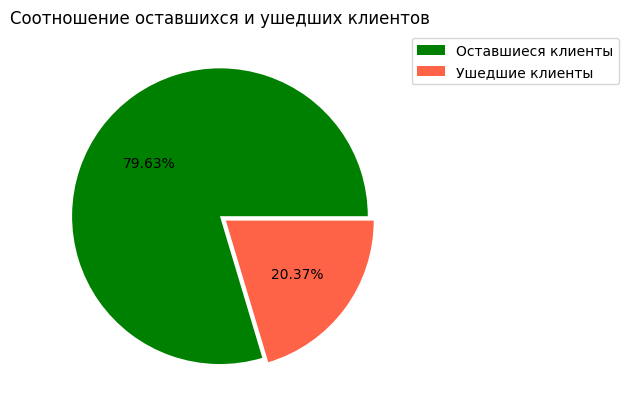

In [4]:
ax = churn_df \
    .groupby(['Exited'])['CustomerId'] \
    .count() \
    .plot(
        kind='pie', 
        colors=['green', 'tomato'], 
        title='Соотношение оставшихся и ушедших клиентов',
        autopct='%.2f%%',
        xlabel='',
        ylabel='',
        labeldistance=None,
        explode=[0, 0.05],
        legend=True, 
    );
ax.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'], bbox_to_anchor=(1, 1), loc='upper left');


#### Анализ

- Оставшихся клиентов в 4 раза больше ушедших

---
### 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

#### Построение графика

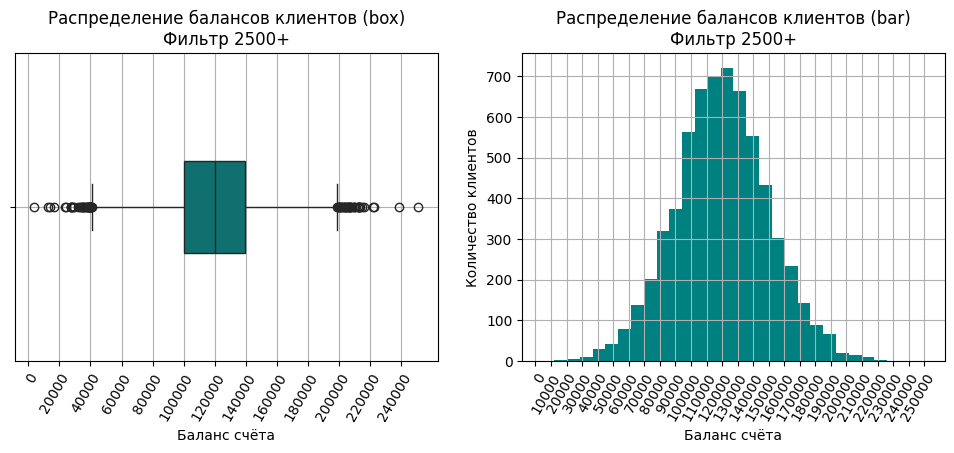

In [5]:
mask = churn_df['Balance'] > 2500

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

churn_df[mask]['Balance'].plot(
    kind='hist', 
    bins=30,
    title='Распределение балансов клиентов (bar)\nФильтр 2500+',
    xticks=range(0, int(churn_df['Balance'].max()), 10000),
    ax=ax2,
    color='teal',
    grid=True,
    xlabel='Баланс счёта',
    ylabel='Количество клиентов',
    legend=False, 
);
sns.boxplot(
    data=churn_df[mask],
    x='Balance',
    orient='h',
    width=0.3,
    ax=ax1,
    color='teal',
);

ax1.grid()
ax1.set_title('Распределение балансов клиентов (box)\nФильтр 2500+');
ax1.set_xlabel('Баланс счёта');
ax1.set_ylabel('');
ax1.set_xticks(ticks=range(0, int(churn_df['Balance'].max()), 20000))

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=60, ha="right", rotation_mode="anchor", y=0) 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=60, ha="right", rotation_mode="anchor", y=0) 
plt.show()

#### Анализ

- Основное количество клиентов обладают счетами от 100 до 140 тысяч долларов.

- Пик размера счетов приходится на клиентов со счетами 120 тысяч долларов.

- Диаграмма имеет нормальное распределение, каких-либо аномальных отклонений не обнаруживается.

---
### 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

#### Построение графика

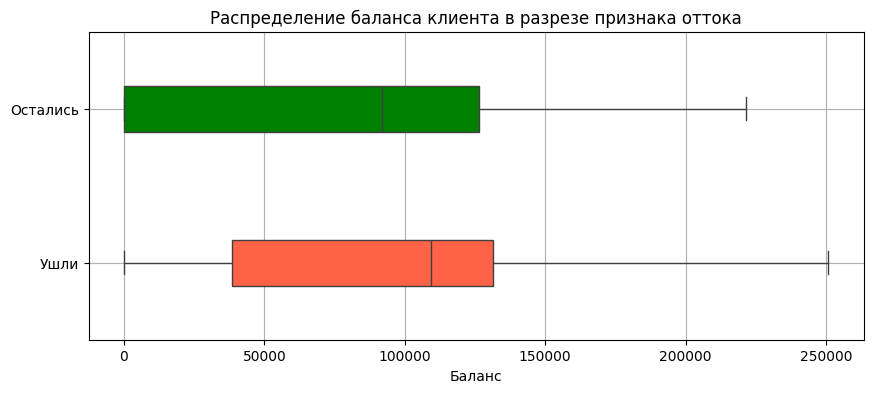

In [6]:
data_df = churn_df.loc[:, ['Balance', 'Exited']]

fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=data_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.3,
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('');
# boxplot.set_xticks(range(0, 260000, 25000));
boxplot.set_yticks([0, 1]);
boxplot.set_yticklabels(['Остались', 'Ушли']);
boxplot.patches[0].set_facecolor('green')
boxplot.patches[1].set_facecolor('tomato')
boxplot.grid()


#### Анализ

- Ушедшие клиенты, в основном, по всем параметрам богаче (или больше хрянят денег в безнале), чем оставшиеся.

- Причины ухода могут быть различны, но исходя из графика возможно одна из них, плохие условия хранения денег в этом банке, например, низкие проценты по вкладам, или большие операционные комиссии. Что, на бОльших суммах заметнее влияет на прибыль клиента и влечёт за собой принятие решения о переходе в банк с более выгодными условиями.

---
### 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

#### Построение графика

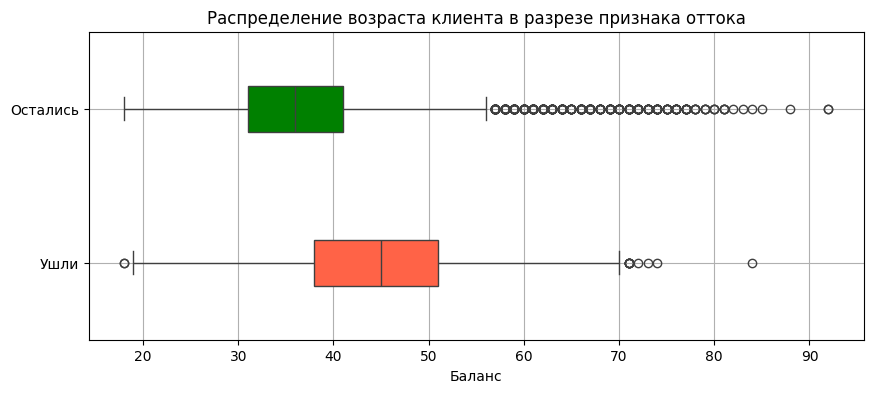

In [7]:
data_df = churn_df.loc[:, ['Age', 'Exited']]

fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=data_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.3,
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('');
# boxplot.set_xticks(range(0, 260000, 25000));
boxplot.set_yticks([0, 1]);
boxplot.set_yticklabels(['Остались', 'Ушли']);
boxplot.patches[0].set_facecolor('green')
boxplot.patches[1].set_facecolor('tomato')
boxplot.grid()


#### Анализ

- Основной объем счетов _**действующих клиентов**_ приходится на людей в возрасте _**32 - 42**_ лет.

- Основной _**отток клиентов**_ приходится на людей в возрасте _**38 - 51**_ года. Этот возраст сильно кореллирует с возрастом который, согласно статистических исследований, приходится на большинство топ-менеджеров и руководителей собственного бизнеса. Например в списках Fortune 500 это от 43 до 58 лет. Таким образом можно сделать предварительный вывод, что банк не очень привлекателен для бизнесменов. Особенно это становится более точным утверждением при сравнении с анализом из задания 9.3.

- Отмечаются потенциально аномальные выбросы в списке действующих клиентов в возрасте 56 лет и выше. Возможно это связано с непривлекательными условиями банка для клиентов указанного возраста. И нужно учитывать, что первая треть этого диапазона (четвертый квартиль) почти на 2/3 кореллирует с четвертим квартилем диапазона оттока клиентов, что указывает на малое влияние на этот параметр (по крайней мере на его первую треть) естественной убыли населения в этом возрасте. **_(Возможно и наоборот, но без понимания механизма получения доступа к счетам наследниками, механизма смены его владельца и знания о том, попадают ли счета умерших клиентов в категорию "Ушли" я могу сделать только такой анализ)_**

---
### 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

#### Построение графика

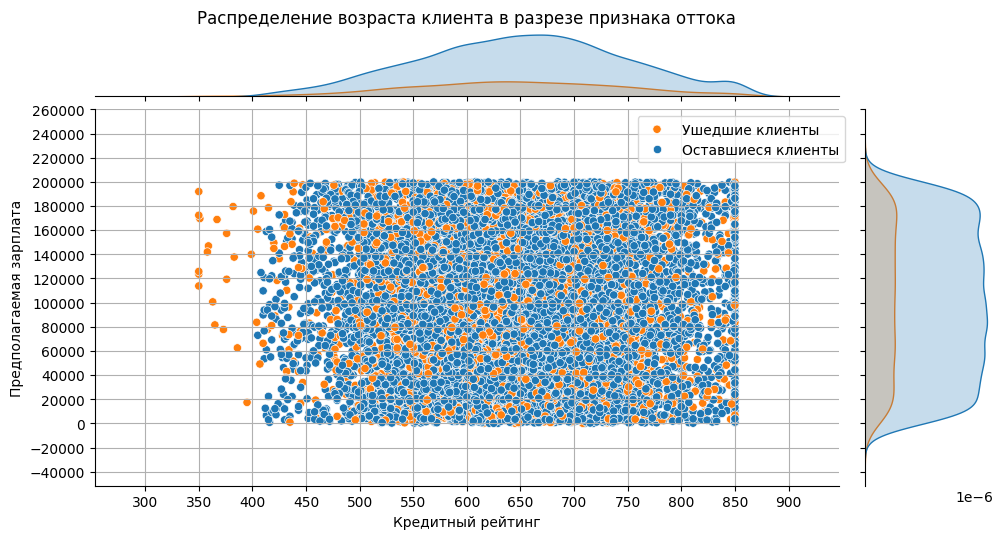

In [8]:
data_df = churn_df.loc[:, ['CreditScore', 'EstimatedSalary', 'Exited']]

# data_df = data_df[data_df['Exited'] == 1]

jointplot = sns.jointplot(
    data=data_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    height=8,
    hue='Exited',
    # hue_order=[1,0],
    kind='scatter',
    # kind='kde',
);

a, b = ('Оставшиеся клиенты', 'Ушедшие клиенты') if jointplot.figure.axes[0].get_legend_handles_labels()[0] == '0' \
    else ('Ушедшие клиенты', 'Оставшиеся клиенты')
jointplot.figure.axes[0].legend([a, b])
jointplot.figure.axes[0].legend_.set_bbox_to_anchor((0.72, 1))
jointplot.figure.axes[0].legend_.set_loc('upper left')
jointplot.figure.axes[0].legend_.set_title('')
jointplot.figure.axes[0].set_xlabel('Кредитный рейтинг');
jointplot.figure.axes[0].set_ylabel('Предполагаемая зарплата');
jointplot.figure.axes[1].set_title('Распределение возраста клиента в разрезе признака оттока');
jointplot.figure.set_figwidth(10)
jointplot.figure.set_figheight(5)
# jointplot.figure.axes[0].set_xscale('log')
# jointplot.figure.axes[0].set_yscale('log')

jointplot.figure.axes[0].set_yticks(ticks=range(-40000, int(churn_df['EstimatedSalary'].max() + 80000), 20000));
jointplot.figure.axes[0].set_xticks(ticks=range(300, 901, 50));
# plt.setp( jointplot.figure.axes[0].yaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor", y=0) 

jointplot.figure.axes[0].grid(True)


#### Анализ

- Не нахожу особой взаимосвязи или аномалий. Разве что: ушли все клиенты с рейтингом ниже 400. Не могу определить насколько эта информация полезна.

---
### 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

#### Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

#### Построение графика

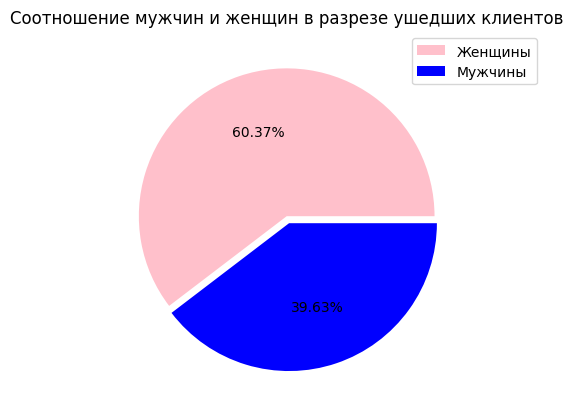

In [9]:
data_df = churn_df.groupby(['Gender'])['Exited'].mean()

ax = data_df.plot(
        kind='pie', 
        colors=['pink', 'blue'], 
        title='Соотношение мужчин и женщин в разрезе ушедших клиентов',
        autopct='%.2f%%',
        xlabel='',
        ylabel='',
        labeldistance=None,
        explode=[0, 0.05],
        legend=True, 
    );

a, b = ('Мужчины', 'Женщины') if ax.get_legend_handles_labels()[0] == 'Male' \
    else ('Женщины', 'Мужчины')
ax.legend([a, b])
ax.legend_.set_bbox_to_anchor((0.82, 1))
ax.legend_.set_loc('upper left')
ax.legend_.set_title('')

#### Анализ

- Женщины покидают банк в 1,5 раза чаще чем мужчины

---
### 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

#### Построение графика

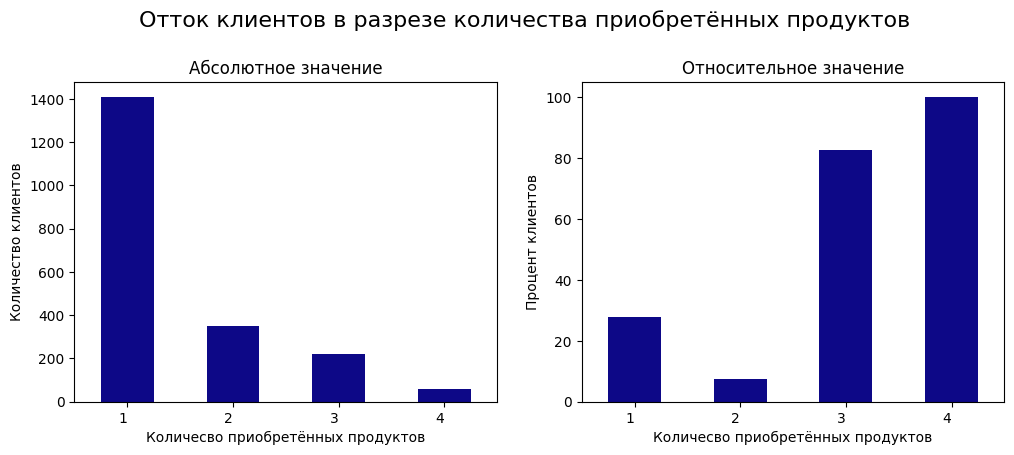

In [10]:
mask_exited = churn_df['Exited'] == 1
mask_loyal = churn_df['Exited'] == 0

data_df = churn_df.loc[:, ['NumOfProducts', 'Exited']]

data_df_num_of_products = data_df.groupby(by=['NumOfProducts', 'Exited'])['Exited'].count()
# prepade relative dataset
data_df_num_of_products = data_df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['Exited'].count()
data_df_num_of_products = data_df_num_of_products.groupby(by=['NumOfProducts'], as_index=False)['Exited'].sum()
data_df_num_of_products.rename(columns={'Exited':'Overall'}, inplace= True)

data_df_abs = data_df[mask_exited].groupby(by=['NumOfProducts'], as_index=False)['Exited'].sum()

data_df_num_of_products.drop(data_df_num_of_products.columns[data_df_num_of_products.columns.isin(data_df_abs.columns)], axis=1, inplace=True)

data_df_rel = pd.concat([data_df_abs,data_df_num_of_products], axis=1).drop_duplicates(['NumOfProducts'])
data_df_rel['Percent'] = data_df_rel['Exited'] / data_df_rel['Overall'] * 100 
##

fig, (ax1, ax2, ) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

fig.suptitle('Отток клиентов в разрезе количества приобретённых продуктов', fontsize=16)

data_df_rel.plot(
    x='NumOfProducts',
    y='Exited',
    kind='bar',
    grid=True,
    title='Абсолютное значение',
    figsize=(12, 4),
    colormap='plasma',
    ax=ax1,
    legend=False,
);

data_df_rel.plot(
    x='NumOfProducts',
    y='Percent',
    kind='bar',
    grid=True,
    title='Относительное значение',
    figsize=(12, 4),
    colormap='plasma',
    ax=ax2,
    legend=False,
);



ax1.grid()
ax1.set_xlabel('Количесво приобретённых продуктов');
ax1.set_ylabel('Количество клиентов');
ax1.x = 1
# ax1.legend([])
# ax1.set_xticks(ticks=range(0, int(churn_df['Balance'].max()), 20000))
ax2.grid()
ax2.set_xlabel('Количесво приобретённых продуктов');
ax2.set_ylabel('Процент клиентов');
ax2.x = 1
# ax2.legend([])
# ax1.set_xticks(ticks=range(0, int(churn_df['Balance'].max()), 20000))

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor", y=0) 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor", y=0) 
plt.subplots_adjust(top=0.8,bottom=0)
plt.show()


#### Анализ

- В абсолютных значениях больше всего ушло клиентов купивших 1 продукт.
- Относительно общего числа клиентов ушли 80% клтиентов купивших 3 продукта и все купившие 4 продукта.

---
### 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

#### Построение графика

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

#### Анализ

---
### 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

#### Построение графика

#### Анализ

---
### 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#### Построение графика

#### Анализ

#### Анализ